Código equivalente ao código anterior, mas agora com uma rede neural de duas camadas, onde cada camada tem um neurônio. A primeira camada recebe as entradas, e a segunda camada recebe a saída da primeira camada como entrada. Vamos usar o mesmo dataset fictício (problema XOR) e permitir a escolha de funções de ativação.

Aluno: Lucas R Goulart


Matricula: 202210713

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Dataset fictício (problema de classificação binária)

#dataset de pressao arterial e nivel de colesterol e a saida é diagnostico de doença

X = np.array([[0.44,0.23], [0.67,0.69], [0.22,0.00], [0.33,0.54],[0.78,0.92]])  # Entradas
y = np.array([[0], [1], [0], [0], [1]])              # Saídas esperadas (XOR)

# Hiperparâmetros
learning_rate = 0.1
epochs = 10000

# Inicialização dos pesos e viés
np.random.seed(42)
# Camada 1: 2 entradas -> 1 neurônio
weights_1 = np.random.randn(2, 1)
bias_1 = np.random.randn()

# Camada 2: 1 entrada (saída da camada 1) -> 1 neurônio
weights_2 = np.random.randn(1, 1)
bias_2 = np.random.randn()

# Escolha da função de ativação
activation_function = relu
activation_derivative = relu_derivative

# Treinamento da rede
errors = []
for epoch in range(epochs):
    # Forward pass
    # Camada 1
    weighted_sum_1 = np.dot(X, weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    # Camada 2
    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    # Cálculo do erro (erro quadrático médio)
    error = y - output_2
    errors.append(np.mean(np.square(error)))

    # Backpropagation
    # Gradiente da camada 2
    d_error = -2 * error / len(X)
    d_output_2 = activation_derivative(weighted_sum_2)
    gradient_2 = d_error * d_output_2

    # Gradiente da camada 1
    d_output_1 = activation_derivative(weighted_sum_1)
    gradient_1 = np.dot(gradient_2, weights_2.T) * d_output_1

    # Atualização dos pesos e viés
    weights_2 -= learning_rate * np.dot(output_1.T, gradient_2)
    bias_2 -= learning_rate * np.sum(gradient_2)

    weights_1 -= learning_rate * np.dot(X.T, gradient_1)
    bias_1 -= learning_rate * np.sum(gradient_1)

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.5485747478783336
Época 1000, Erro: 0.013688561674989396
Época 2000, Erro: 0.013665407032071437
Época 3000, Erro: 0.013641431875205196
Época 4000, Erro: 0.013616586582021376
Época 5000, Erro: 0.013590819742711351
Época 6000, Erro: 0.013564078129885592
Época 7000, Erro: 0.013536306673721238
Época 8000, Erro: 0.013507448442267516
Época 9000, Erro: 0.013477444626935547


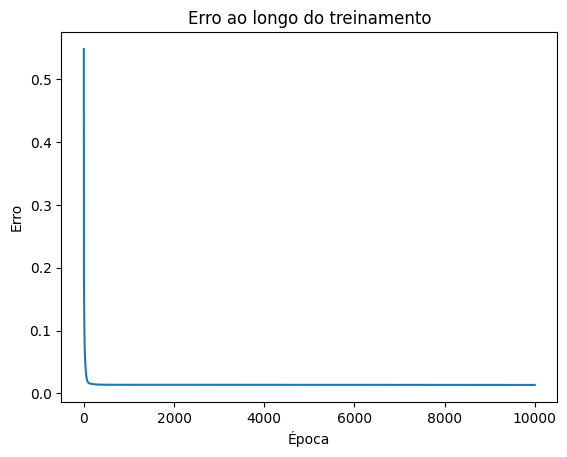


Teste da rede treinada:
Entrada: [0.44 0.23], Saída esperada: [0], Saída da rede: [0.06892618]
Entrada: [0.67 0.69], Saída esperada: [1], Saída da rede: [0.79224353]
Entrada: [0.22 0.  ], Saída esperada: [0], Saída da rede: [0.]
Entrada: [0.33 0.54], Saída esperada: [0], Saída da rede: [0.]
Entrada: [0.78 0.92], Saída esperada: [1], Saída da rede: [1.13898778]


In [21]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste da rede treinada
print("\nTeste da rede treinada:")
for i in range(len(X)):
    # Forward pass
    weighted_sum_1 = np.dot(X[i], weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída da rede: {output_2}")